# BASEBALL PROJECT

Data Description

# Importing  Necessary Libraries

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
import joblib
import warnings 
warnings.filterwarnings('ignore')

In [35]:
df=pd.read_csv('baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [36]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [37]:
df.shape

(30, 17)

In [38]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [39]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


# Data Visualisations

In [41]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

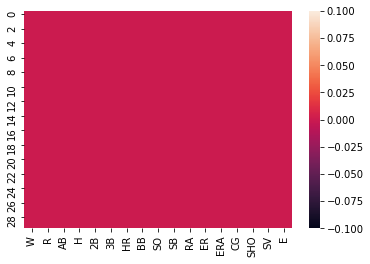

In [42]:
sns.heatmap(df.isnull())

we can see here there is no null values in the given dataset

In [43]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


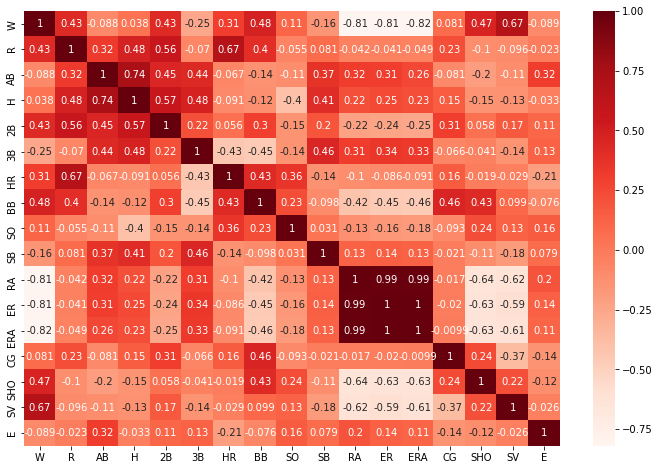

In [44]:
fig=plt.figure(figsize=(12,8))
hf=df.corr(method ='pearson')
sns.heatmap(hf,annot=True,cmap='Reds')

here we see the correlation plot of each of the columns

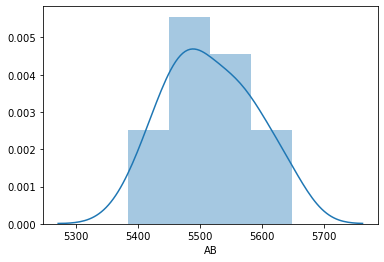

In [45]:
sns.distplot(df['AB'])

In [46]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

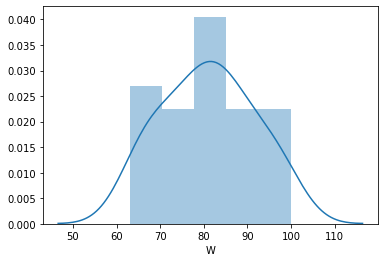

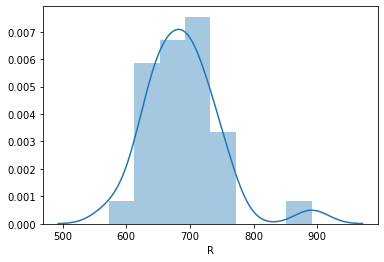

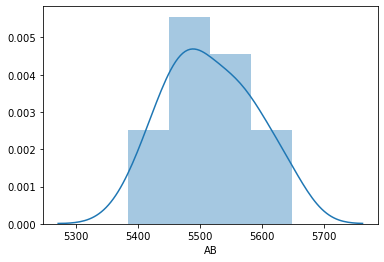

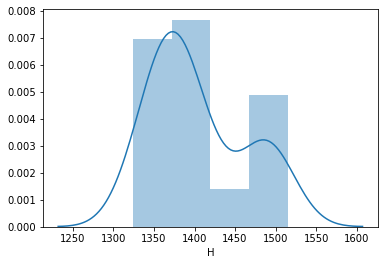

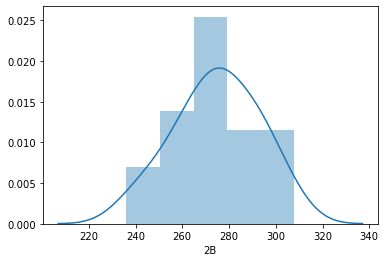

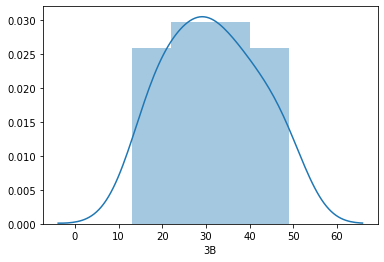

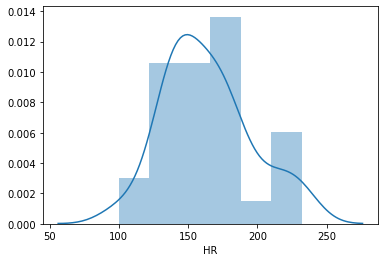

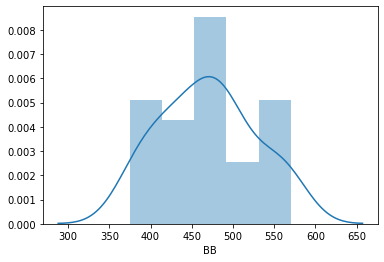

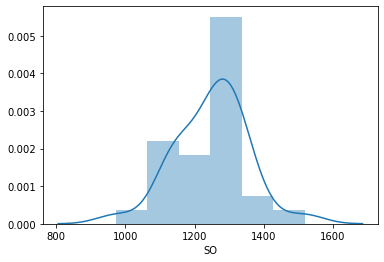

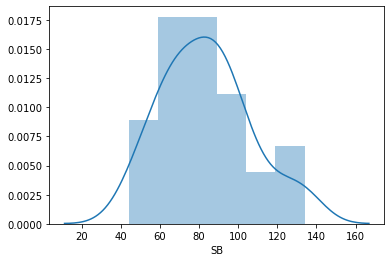

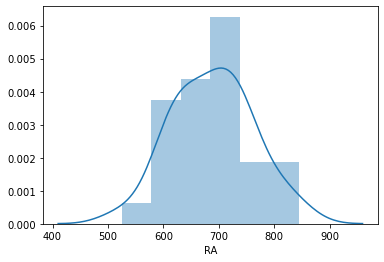

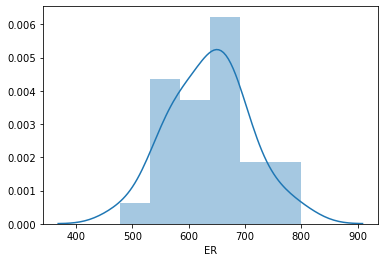

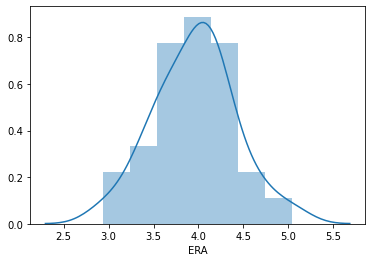

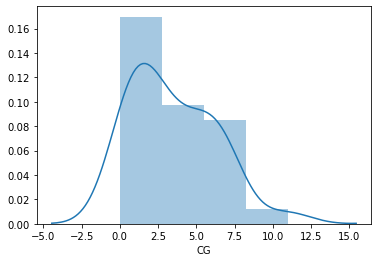

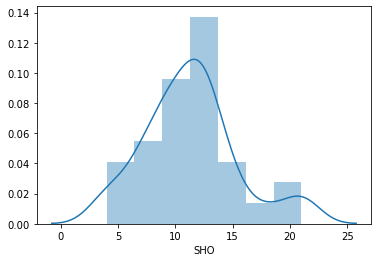

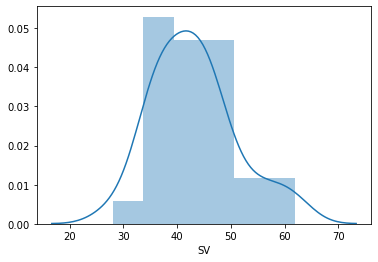

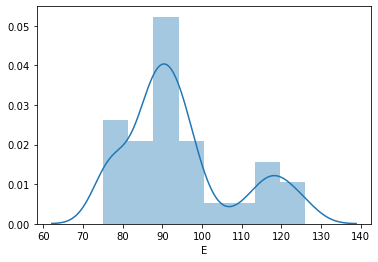

In [47]:
columns=['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E']
for i in df[columns]:
    plt.figure()
    sns.distplot(df[i])

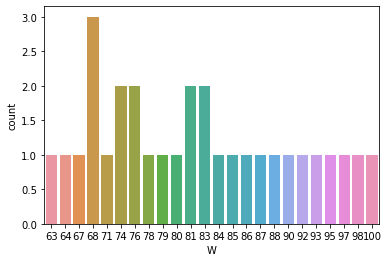

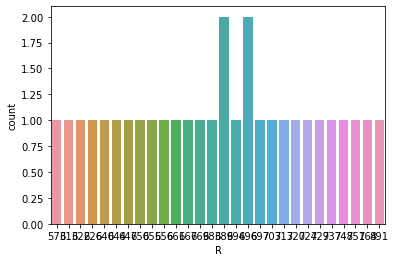

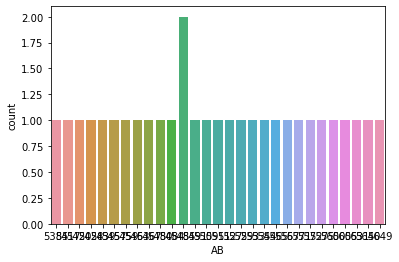

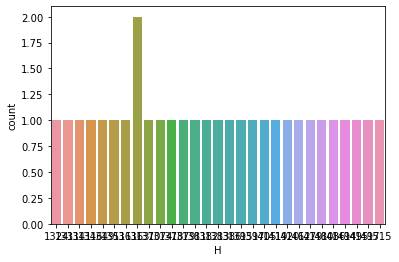

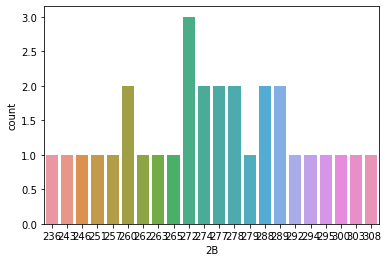

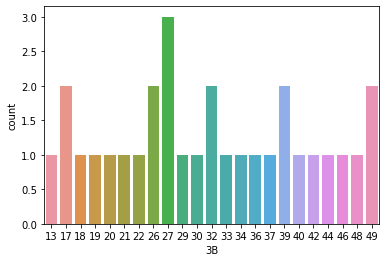

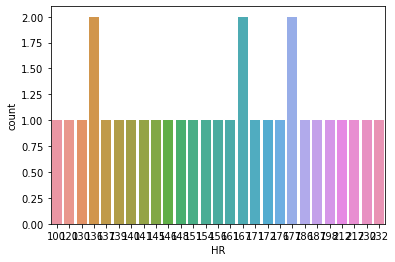

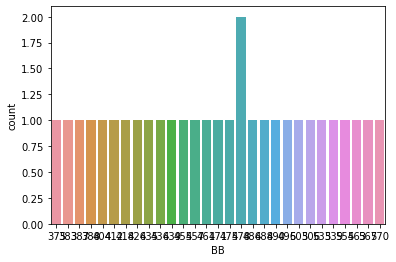

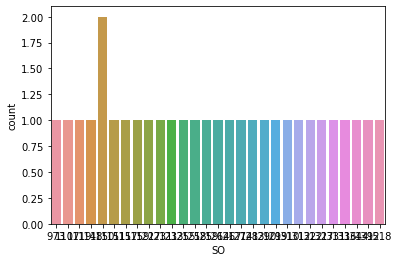

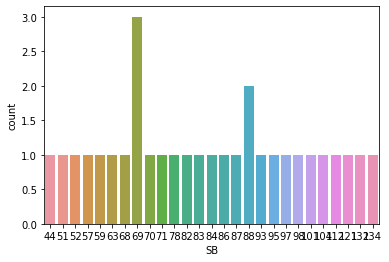

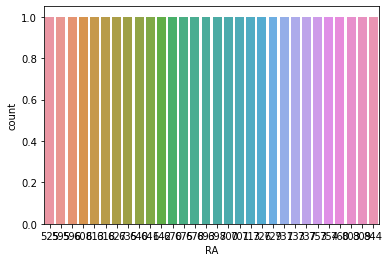

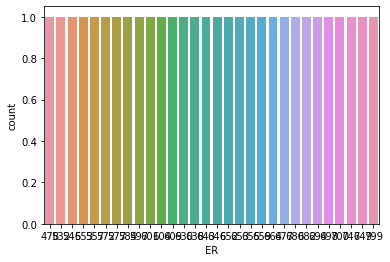

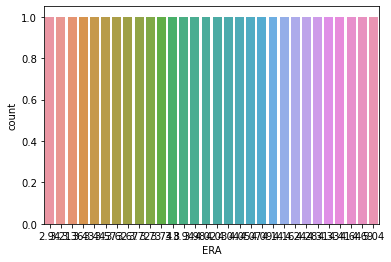

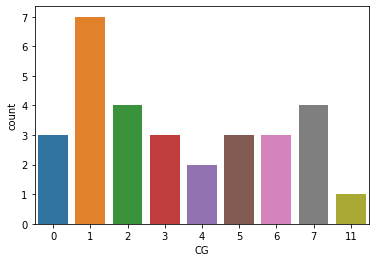

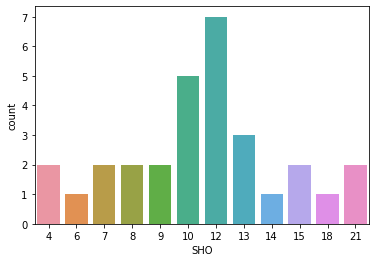

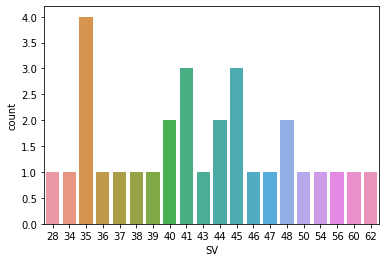

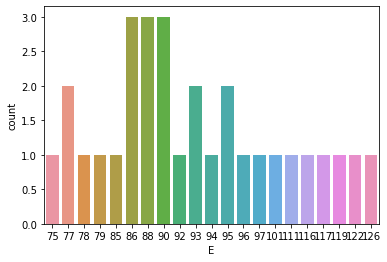

In [48]:
columns=['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E']
for i in df[columns]:
    plt.figure()
    sns.countplot(df[i])

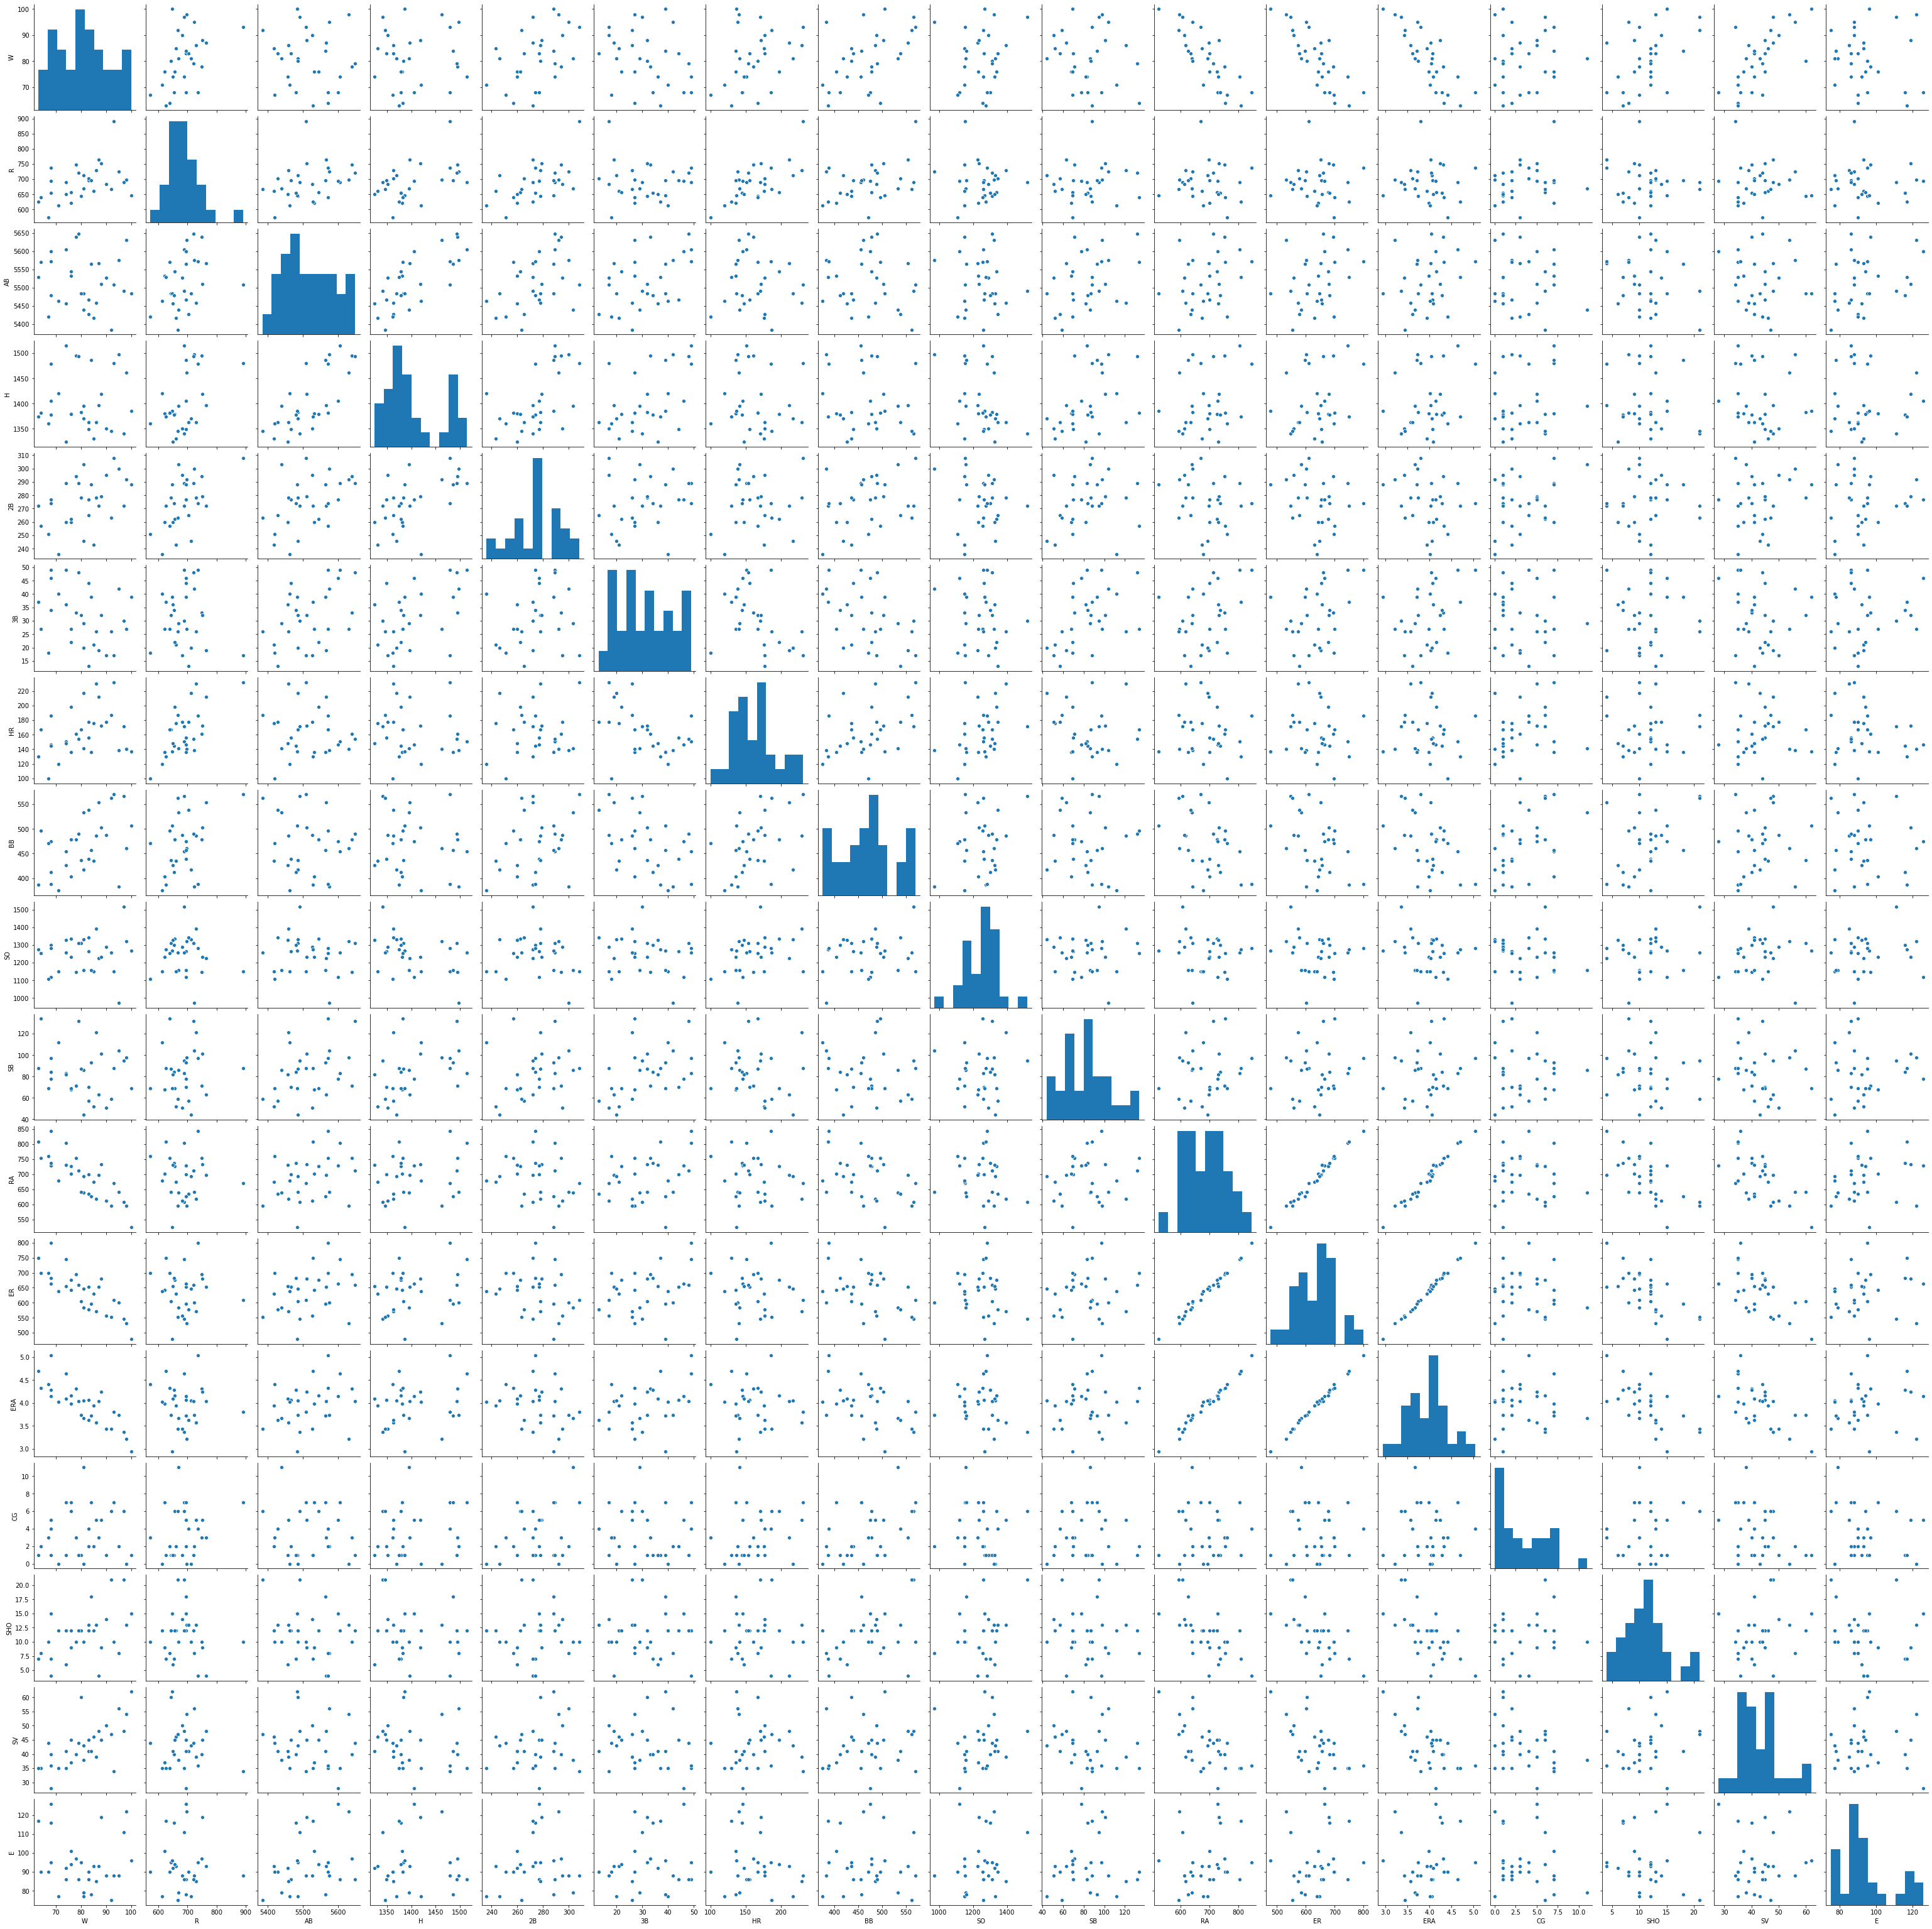

In [49]:
sns.pairplot(df)

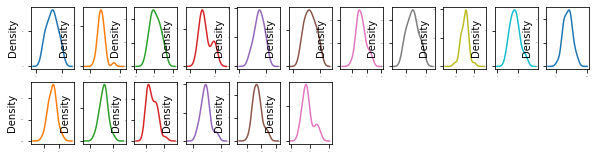

In [50]:
df.plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(10,8))
plt.show()

from this density plot curve we see only some skewness in few graphs

# Checking Outliers

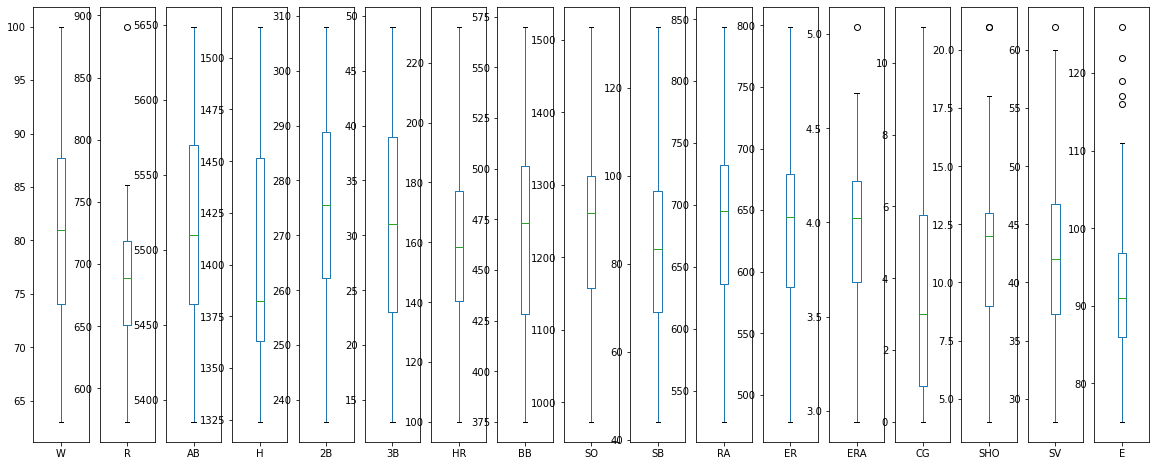

In [51]:
df.plot(kind='box',subplots=True,layout=(1,17),figsize=[20,8])
plt.show()

# Train Test split

In [52]:
x=df.iloc[:,0:-1]
x.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35


In [53]:
x.shape

(30, 16)

In [54]:
y=df.iloc[:,-1]
y.head()

0     88
1     86
2     79
3    101
4     86
Name: E, dtype: int64

In [55]:
y.shape

(30,)

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=46)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(21, 16)
(9, 16)
(21,)
(9,)


# Model Building

In [57]:
LR=LinearRegression()
DTR=DecisionTreeRegressor()
RF=RandomForestRegressor()
GD=GradientBoostingRegressor()

In [58]:
model=[LR,DTR,RF,GD]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('r2 score:',m)
    print(r2_score(y_test,pred))
    print(mean_squared_error(y_test,pred))
    print(mean_absolute_error(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    print('Cross_val_score',score)
    print('Mean Score',score.mean())
    print('Standard Deviation',score.std())

r2 score: LinearRegression()
-3.578286233913343
623.099104230379
17.041625075322013
Cross_val_score [-6.56861692 -0.76825218 -7.97131269 -2.28457348 -5.50860497]
Mean Score -4.6202720482990305
Standard Deviation 2.687310978197697
r2 score: DecisionTreeRegressor()
-2.45010885341074
469.55555555555554
18.22222222222222
Cross_val_score [-2.17829457 -0.33388594 -3.32628676 -0.56846974 -0.99036356]
Mean Score -1.4794601146589965
Standard Deviation 1.120767359821513
r2 score: RandomForestRegressor()
-0.17351672714078337
159.71417777777773
10.204444444444443
Cross_val_score [-1.77230116 -0.18660206 -2.43370561 -0.4768816  -0.38797573]
Mean Score -1.0514932318876973
Standard Deviation 0.8886558238075682
r2 score: GradientBoostingRegressor()
-0.3330577230770242
181.4275103605076
12.06367705192774
Cross_val_score [-1.45871517 -0.38280195 -2.64263127 -0.81923642 -0.26200583]
Mean Score -1.1130781291483025
Standard Deviation 0.872120183731345


# saving model

In [59]:
import joblib
joblib.dump(GD,'GradientboostingregressorM.obj')

['GradientboostingregressorM.obj']